<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0.0.1">Импорт библиотек</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обработка-исходных-данных" data-toc-modified-id="Загрузка-и-обработка-исходных-данных-1.1">Загрузка и обработка исходных данных</a></span></li><li><span><a href="#Загрузка-и-обработка-дополнительных-данных" data-toc-modified-id="Загрузка-и-обработка-дополнительных-данных-1.2">Загрузка и обработка дополнительных данных</a></span></li><li><span><a href="#Подготовка-целевого-признака" data-toc-modified-id="Подготовка-целевого-признака-1.3">Подготовка целевого признака</a></span></li><li><span><a href="#Подготовка-субтитров" data-toc-modified-id="Подготовка-субтитров-1.4">Подготовка субтитров</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-1.5">Объединение данных</a></span></li><li><span><a href="#Подготовка-данных-к-обучению:-векторизация-текста,-разделение-на-обучающую-и-тестовую-выборки" data-toc-modified-id="Подготовка-данных-к-обучению:-векторизация-текста,-разделение-на-обучающую-и-тестовую-выборки-1.6">Подготовка данных к обучению: векторизация текста, разделение на обучающую и тестовую выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.7">Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1">Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2">Случайный лес</a></span></li><li><span><a href="#Градиентный-бустинг-CatBoost" data-toc-modified-id="Градиентный-бустинг-CatBoost-2.3">Градиентный бустинг CatBoost</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-2.4">BERT</a></span></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-2.5">Сравнение моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6">Вывод</a></span></li></ul></li><li><span><a href="#Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="Проверка-моделей-на-тестовой-выборке-3">Проверка моделей на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Градиентный-бустинг-CatBoost" data-toc-modified-id="Градиентный-бустинг-CatBoost-3.1">Градиентный бустинг CatBoost</a></span></li><li><span><a href="#BERT" data-toc-modified-id="BERT-3.2">BERT</a></span></li><li><span><a href="#Наивная-модель-DummyClassifier" data-toc-modified-id="Наивная-модель-DummyClassifier-3.3">Наивная модель DummyClassifier</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4">Выводы</a></span></li></ul></div>

# Прогнозирование уровня сложности фильмов на английском языке

Просмотр фильмов на оригинальном языке - популярный и действенный метод ускорить изучение иностанного языка. При этом важно выбрать фильм, который подходит студенту по уровню сложности изучаемого языка: понимание 50-70% диалогов фильма будет оптимальным для продуктивного обучения.   

**Цель проекта:** разработать алгоритм машинного обучения для автоматического определения уровня сложности англоязычных фильмов.

**Задачи:**  
- выполнить подготовку текстовых данных
- обучить несколько моделей ML на данных, выбрать лучшую модель
- расширить датасет, обучить модель на расширенных данных


#### Импорт библиотек

In [1]:
# установка необходимых библиотек

#!pip3 install nltk
#!pip3 install textblob
#!pip3 install catboost
#!pip3 install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import notebook

import pysrt
import re
import string
from pathlib import Path
  
import spacy
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from catboost import Pool, CatBoostClassifier

import torch
import transformers

from sklearn.metrics import accuracy_score

RANDOM_STATE = 12345


import warnings
warnings.simplefilter("ignore", ResourceWarning)
warnings.simplefilter("ignore", FutureWarning)

In [3]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/alina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/alina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/alina/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Подготовка данных

### Загрузка и обработка исходных данных

Прочитаем файл с исходными данными и сохраним его в переменной `df`:

In [4]:
df = pd.read_csv('data/labels.csv')

Для ознакомления с данными выведем на экран информацию о таблице и первые 10 строк таблицы:

In [5]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       88 non-null     object
 1   Kinopoisk   69 non-null     object
 2   Level       88 non-null     object
 3   Subtitles   88 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB
None


,Movie,Kinopoisk,Level,Subtitles
0,Forrest Gump,Rus sub,"A2/A2+, B1",Yes
1,Finding Nemo\n,Everything,A2/A2+,Yes
2,Cast away\n,"Paid, Rus sub",A2/A2+,Yes
3,The invisible man (2020)\n,"Paid, Rus lan",A2/A2+,Yes
4,Back to the future\n,Rus sub,A2/A2+,Yes
5,Twilight\n,"No subs, Paid",A2/A2+,Yes
6,Toy story,Everything,A2/A2+,Yes
7,The cabin in the woods\n,"No subs, Paid",A2/A2+,Yes
8,Up,Everything,A2/A2+,Yes
9,Dredd\n,Rus lan,A2/A2+,Yes


В нашем распоряжении информация об уровнях сложности 88 фильмов. 
Текстовые признаки предстоит подготовить из файлов с субтитрами, целевым признаком является колонка **Level**.  

Названия фильмов имеют разный формат и содержат лишние символы. Для удобства данльнейшей обработки данных приведём названия к одинаковому виду.

In [6]:
def title_improve(column):
    # удалим лишние знаки '\n'
    column = column.map(lambda x: x.replace('\n', ''))
    # приведём слова к нижнему регистру, удалим лишние символы
    column = column.map(lambda x: re.sub(r"[^0-9a-z'\-\s+]", "", x.lower()))
    # удалим пробелы в конце названий
    column = column.map(lambda x: re.sub(r"\s$", "", x))
    # заменим пробелы на нижнее подчеркивание
    column = column.map(lambda x: x.replace(' ', '_').replace('__', '_'))
    return column

In [7]:
df['Movie'] = title_improve(df['Movie'])

Проверим, как прошло преобразование названий фильмов, а также выведем уникальные значения оставшихся колонок.

In [8]:
for _ in df.columns:
    print(_)
    print(df[_].sort_values().unique())
    print()

Movie
['10_cloverfield_lane' '10_things_i_hate_about_you' 'a_knights_tale'
 'a_star_is_born' 'aladdin' 'all_dogs_go_to_heaven' 'an_american_tail'
 'babe' 'back_to_the_future' 'batman_begins' 'beauty_and_the_beast_film'
 'before_i_go_to_sleep' 'before_sunrise' 'before_sunset' 'braveheart'
 'bridget_jones_diary' 'cast_away' 'catch_me_if_you_can' 'clueless'
 'deadpool' 'die_hard' 'dredd' 'dune'
 'eurovision_song_contest_the_story_of_fire_saga' 'fight_club'
 'finding_nemo' 'forrest_gump' 'good_will_hunting' 'groundhog_day'
 'harry_potter_1' 'her' 'home_alone' 'hook' 'house_of_gucci' 'inside_out'
 'its_a_wonderful_life' 'knives_out' 'kubo_and_the_two_strings'
 'liar_liar' 'lie_to_me_series' 'lion' 'logan' 'love_actually' 'mamma_mia'
 'mary_poppins_returns' 'matilda' 'meet_the_parents' 'moulin_rouge'
 'mrs_doubtfire' 'my_big_fat_greek_wedding' 'notting_hill'
 'pirates_of_the_caribbean_1' 'pleasantville' 'powder' 'pulp_fiction'
 'ready_or_not' 'shrek' 'sleepless_in_seattle' 'soul' 'the_blind_

Названия фильмов теперь имеют одинаковый вид.  
В колонке с целевым признаком содержится 5 категорий, некоторые категории содержат в себе до трех подкатегорий, поэтому в дальнейшем мы уменьшим количество категорий, объединив их в наименьшую по уровню категорию для каждого случая.  

Проверим, не дублируются ли названия фильмов.

In [9]:
df['Movie'].duplicated().sum()

0

### Загрузка и обработка дополнительных данных

Загрузим дополнительную таблицу `df_new` с фильмами, которые удалось найти в процессе работы над проектом. Сразу обработаем названия фильмов функцией `title_improve`, выведем информацию о таблице, первые 5 строк и количество дубликатов.    

In [10]:
df_new = pd.read_csv('data/labels_new.csv')
    

df_new['Movie'] = title_improve(df_new['Movie'])
print(df_new.info())
print('DUPLICATES:', df_new['Movie'].duplicated().sum())
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie       28 non-null     object 
 1   Kinopoisk   0 non-null      float64
 2   Level       28 non-null     object 
 3   Subtitles   0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 1.0+ KB
None
DUPLICATES: 0


,Movie,Kinopoisk,Level,Subtitles
0,kubo_and_the_two_strings,NaN,B1,NaN
1,charlie_and_the_chocolate_factory,NaN,B1,NaN
2,cinderella,NaN,B1,NaN
3,ferdinand,NaN,B1,NaN
4,inside_out,NaN,B1,NaN


Посмотрим на уникальные значения каждого столбца новой таблицы.

In [11]:
for _ in df_new.columns:
    print(_)
    print(df_new[_].sort_values().unique())
    print()

Movie
['banking_on_bitcoin' 'bridget_joness_baby' 'cars'
 'charlie_and_the_chocolate_factory' 'cinderella' 'despicable_me'
 'enola_holmes' 'entrapment' 'ferdinand' 'inside_out' 'klaus'
 'kubo_and_the_two_strings' 'made_of_honor' 'milada' 'mona_lisa_smile'
 'oceans_eleven' 'oceans_twelve' 'ratatouille' 'sleepless_in_seattle'
 'the_blind_side' 'the_devil_wears_prada' 'the_fundamentals_of_caring'
 'the_intern' 'the_legend_of_tarzan' 'the_secret_life_of_pets'
 'the_terminal' 'while_you_were_sleeping' 'zootopia']

Kinopoisk 
[nan]

Level
['B1' 'B2' 'C1']

Subtitles
[nan]



В новой таблице содержатся 3 категории фильмов, среди которых одна новая - C1.

Посмотрим, не дублируются ли названия фильмов в обеих таблицах:

In [12]:
df_new['Movie'].append(df['Movie']).duplicated().sum()

5

Обе таблицы содержат  5 пересекающихся фильмов. При дальнейшем объединении этих таблиц необходимо будет удалить дубликаты.

### Подготовка целевого признака

В обеих таблицах целевой признак имеет текстовый вид. Назначим для каждой категории номер и приведём целевой признак к типу `int` так, чтобы уровень фильма определялся по наименьшей по уровню владения языком категории.  
Создадим таблицу с уровнями английского языка.  
Начиная с уровня B2 начинается свободное владение языком, поэтому студенты с уровнем B2 и выше будут понимать как минимум 50-70% диалогов, даже если уровень фильма будет сложнее (например, C1 и C2), поэтому категории B2, C1, C2 объединим, присвоив им одну цифру.

In [13]:
cats = {'category': ['C2', 'C1', 'B2', 'B1', 'A2', 'A1'], 'number': [1, 1, 1, 2, 3 , 4]}
levels = pd.DataFrame(data=cats)
levels

,category,number
0,C2,1
1,C1,1
2,B2,1
3,B1,2
4,A2,3
5,A1,4


Созадим функцию, присваювающую числовое значение категории фильма согласно созданной таблице `levels`.

In [14]:
def film_level(data):
    for _ in range(len(data)):
        for c in range(len(levels)):
            level = levels.loc[c, 'category']
            number = levels.loc[c, 'number']
            if level in data.loc[_, 'Level']:
                data.loc[_, 'level_num'] = int(number)
    data['level_num'] = data['level_num'].astype(int)
    return data

In [15]:
# добавим столбец 'level_num' к исходным данным
df = film_level(df)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       88 non-null     object
 1   Kinopoisk   69 non-null     object
 2   Level       88 non-null     object
 3   Subtitles   88 non-null     object
 4   level_num   88 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.6+ KB
None


,Movie,Kinopoisk,Level,Subtitles,level_num
0,forrest_gump,Rus sub,"A2/A2+, B1",Yes,3
1,finding_nemo,Everything,A2/A2+,Yes,3
2,cast_away,"Paid, Rus sub",A2/A2+,Yes,3
3,the_invisible_man_2020,"Paid, Rus lan",A2/A2+,Yes,3
4,back_to_the_future,Rus sub,A2/A2+,Yes,3


In [16]:
# добавим столбец 'level_num' к дополнительным данным
df_new = film_level(df_new)
print(df_new.info())
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie       28 non-null     object 
 1   Kinopoisk   0 non-null      float64
 2   Level       28 non-null     object 
 3   Subtitles   0 non-null      float64
 4   level_num   28 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ KB
None


,Movie,Kinopoisk,Level,Subtitles,level_num
0,kubo_and_the_two_strings,NaN,B1,NaN,2
1,charlie_and_the_chocolate_factory,NaN,B1,NaN,2
2,cinderella,NaN,B1,NaN,2
3,ferdinand,NaN,B1,NaN,2
4,inside_out,NaN,B1,NaN,2


### Подготовка субтитров

Для подготовки текстов к задаче машинного обучения необходимо провести следующие действия:
- извлечь фразы из файлов с субтитрами
- удалить из фраз пунктуацию, стоп-слова, html теги
- провести лемматизацию слов

Создадим функцию, выполняющую все перечисленные пункты для файла с субтитрами. Функция вернёт массив слов, использованных в каждом фильме.

In [17]:
def sub_processing(subs):
    # initializing punctuations string
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    stop_words = set(stopwords.words('english'))

    # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    sub_prep = []

    for _ in range(1,len(subs)):
    
    
        doc = nlp(subs[_].text)  
        # лемматизация
        doc = " ".join([word.lemma_ for word in doc])
        # удаление пунктуации
        for element in doc:
            if element in punc:
                doc = doc.replace(element, "") 
        # удаляем html теги
        html=re.compile(r'<.*?>') 
        doc = html.sub(r'',doc) 
        
        # удалим имена собственные (с заглавной буквы) и цифры
        doc = re.sub(r"\s*[A-Z0-9]\w*\s*", "", doc).strip().split()
        
        # удаление стоп-слов
        doc = [word for word in doc if word not in stop_words]
    
        for _ in doc:
            sub_prep.append(_)
            
    return sub_prep

Напишем также функцию, которая для каждого фильма находит в заданной папке соотвествующий файл с субтитрами и применяет к нему функцию `sub_processing`.

In [18]:
def sub_search_process(path, df, encoding='utf8'):
    p = Path(path)
    path_list = list(p.glob('*.srt'))

    for i in notebook.tqdm(range(len(df))):
        name = df.loc[i, 'Movie']
    
        for path_srt in path_list:
            path_name = re.sub(r'\([\d{4}]+\)',"", path_srt.stem.lower())
            if (len(name.split('_')) == 1) and (len(path_name.split('_')) == 1):
                if name == path_name:
                    subs = pysrt.open(path_srt, encoding=encoding)
                    df.loc[i, 'Sub'] = ' '.join(sub_processing(subs))
            if (len(name.split('_')) > 1) and (len(path_name.split('_')) > 1):
                if name.split('_')[0] == path_name.split('_')[0] and name.split('_')[1] == path_name.split('_')[1]:
                    subs = pysrt.open(path_srt)
                    df.loc[i, 'Sub'] = ' '.join(sub_processing(subs))
    return df

Обработаем субтитры для фильмов из двух таблиц с помощью созданных функций.

In [19]:
%%time
df = sub_search_process('data/Subtitles/', df)

  0%|          | 0/88 [00:00<?, ?it/s]

CPU times: user 6min 29s, sys: 936 ms, total: 6min 30s
Wall time: 6min 31s


In [20]:
%%time
df_new = sub_search_process('data/subs_new/', df_new, encoding='latin-1')

  0%|          | 0/28 [00:00<?, ?it/s]

CPU times: user 1min 58s, sys: 252 ms, total: 1min 58s
Wall time: 1min 59s


Проверим получившиеся таблицы.

In [21]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       88 non-null     object
 1   Kinopoisk   69 non-null     object
 2   Level       88 non-null     object
 3   Subtitles   88 non-null     object
 4   level_num   88 non-null     int64 
 5   Sub         85 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.2+ KB
None


,Movie,Kinopoisk,Level,Subtitles,level_num,Sub
0,forrest_gump,Rus sub,"A2/A2+, B1",Yes,3,name want chocolate could eat million half mam...
1,finding_nemo,Everything,A2/A2+,Yes,3,advertise product brand brcontact wwwtoday tap...
2,cast_away,"Paid, Rus sub",A2/A2+,Yes,3,hey going right desk head snowbound see go pin...
3,the_invisible_man_2020,"Paid, Rus lan",A2/A2+,Yes,3,come sorrycan take mei sorry go leave thing ok...
4,back_to_the_future,Rus sub,A2/A2+,Yes,3,right make good deal year allmodel find well c...


In [22]:
print(df_new.info())
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie       28 non-null     object 
 1   Kinopoisk   0 non-null      float64
 2   Level       28 non-null     object 
 3   Subtitles   0 non-null      float64
 4   level_num   28 non-null     int64  
 5   Sub         26 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ KB
None


,Movie,Kinopoisk,Level,Subtitles,level_num,Sub
0,kubo_and_the_two_strings,NaN,B1,NaN,2,pay careful attention everything see hear matt...
1,charlie_and_the_chocolate_factory,NaN,B1,NaN,2,name fast strong clever child family rich powe...
2,cinderella,NaN,B1,NaN,2,lovely name sunset frame though dressed rag we...
3,ferdinand,NaN,B1,NaN,2,buzz showwhat get come guycan ha hurt ha ha ge...
4,inside_out,NaN,B1,NaN,2,joydo ever look brat someone wonder iwhat go i...


В полученных таблицах присутствуют пропущенные значения для столбца 'Sub'. Скорее всего, в даннных отсутсвуют некоторые файлы с субтитрами. Выведем строки с пропусками.

In [23]:
df[df['Sub'].isna()]

,Movie,Kinopoisk,Level,Subtitles,level_num,Sub
35,were_the_millers,Nope,B1,Yes,2,NaN
58,lie_to_me_series,NaN,"B1, B2",No,2,NaN
83,the_walking_dead_series,NaN,A2/A2+,No,3,NaN


In [24]:
df_new[df_new['Sub'].isna()]

,Movie,Kinopoisk,Level,Subtitles,level_num,Sub
7,the_terminal,NaN,B1,NaN,2,NaN
19,the_secret_life_of_pets,NaN,B2,NaN,1,NaN


Удалим строки, содержащие пропуски.

In [25]:
df = df[df['Sub'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 87
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       85 non-null     object
 1   Kinopoisk   68 non-null     object
 2   Level       85 non-null     object
 3   Subtitles   85 non-null     object
 4   level_num   85 non-null     int64 
 5   Sub         85 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.6+ KB


In [26]:
df_new = df_new[df_new['Sub'].notna()]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movie       26 non-null     object 
 1   Kinopoisk   0 non-null      float64
 2   Level       26 non-null     object 
 3   Subtitles   0 non-null      float64
 4   level_num   26 non-null     int64  
 5   Sub         26 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ KB


Итак, количество фильмов в обеих таблицах теперь совпадает с количеством обработанных субтитров.

### Объединение данных

Далее обучим различные модели на двух наборах данных: на исходных данных и на объединённом наборе (исходные + дополнительные). Для второго случая объединим таблицы, объединённый датасет назовём `df_all`.

In [27]:
df_all = df.append(df_new)

Вспомним, что некоторые фильмы из двух наборов данных перескаются. Удалим дубликаты фильмов.

In [28]:
df_all = df_all[~df_all['Movie'].duplicated()]
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie       107 non-null    object
 1   Kinopoisk   68 non-null     object
 2   Level       107 non-null    object
 3   Subtitles   85 non-null     object
 4   level_num   107 non-null    int64 
 5   Sub         107 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.9+ KB


,Movie,Kinopoisk,Level,Subtitles,level_num,Sub
0,forrest_gump,Rus sub,"A2/A2+, B1",Yes,3,name want chocolate could eat million half mam...
1,finding_nemo,Everything,A2/A2+,Yes,3,advertise product brand brcontact wwwtoday tap...
2,cast_away,"Paid, Rus sub",A2/A2+,Yes,3,hey going right desk head snowbound see go pin...
3,the_invisible_man_2020,"Paid, Rus lan",A2/A2+,Yes,3,come sorrycan take mei sorry go leave thing ok...
4,back_to_the_future,Rus sub,A2/A2+,Yes,3,right make good deal year allmodel find well c...


Итак, в нашем распоряжении предобработанные данные: исходный датасет, содержащий 85 фильмов с субтитрами и объединённый, содержащий 107 фильмов.

Интересно посмотреть на распределение целевого признака в обоих датасетах до числового перекодирования (колонка `Level`) и после (колонка `level_num`).

Распределение уровней до их объединения:
 B1            0.317647
A2/A2+        0.305882
B2            0.223529
B1, B2        0.094118
A2/A2+, B1    0.058824
Name: Level, dtype: float64


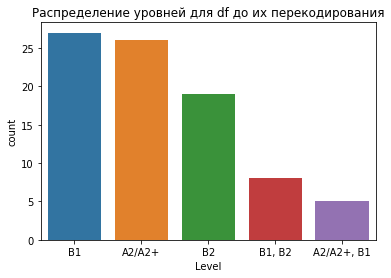


Распределение уровней после их объединения и перекодирования:
 2    0.411765
3    0.364706
1    0.223529
Name: level_num, dtype: float64


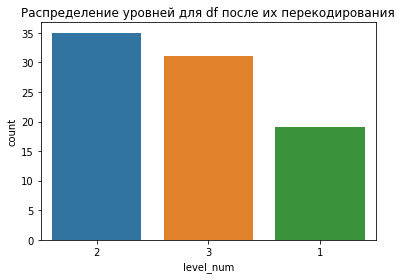

In [29]:
# df['Level']
# выведем долю вхождения каждой категории
print('Распределение уровней до их объединения:\n', 
      df['Level'].value_counts(normalize=True))
# построим гистограмму распределения категорий
sns.countplot(data=df, x='Level', order=df['Level'].value_counts().index) \
        .set(title = 'Распределение уровней для df до их перекодирования');
plt.show()

#df['level_num']
print('\nРаспределение уровней после их объединения и перекодирования:\n',
      df['level_num'].value_counts(normalize=True))

sns.countplot(data=df, x='level_num', order=df['level_num'].value_counts().index) \
        .set(title = 'Распределение уровней для df после их перекодирования');

Распределение уровней до их объединения:
 B1            0.308411
B2            0.252336
A2/A2+        0.242991
C1            0.074766
B1, B2        0.074766
A2/A2+, B1    0.046729
Name: Level, dtype: float64


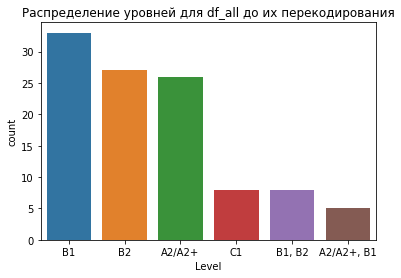


Распределение уровней после их объединения и перекодирования:
 2    0.383178
1    0.327103
3    0.289720
Name: level_num, dtype: float64


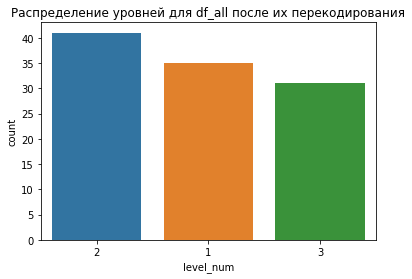

In [30]:
# df_all['Level']
print('Распределение уровней до их объединения:\n', 
      df_all['Level'].value_counts(normalize=True))

sns.countplot(data=df_all, x='Level', order=df_all['Level'].value_counts().index) \
        .set(title = 'Распределение уровней для df_all до их перекодирования');
plt.show()

# df_all['level_num']
print('\nРаспределение уровней после их объединения и перекодирования:\n',
      df_all['level_num'].value_counts(normalize=True))

sns.countplot(data=df_all, x='level_num', order=df_all['level_num'].value_counts().index) \
        .set(title = 'Распределение уровней для df_all после их перекодирования');

**Анализ гистограмм**

* **Таблица df:** до объединения категорий присутствовали малочисленные категории (например, категория `A2/A2+, B1` была представлена всего лишь в 5% случаев. После объединения и числового перекодирования осталось 3 категории, которые хорошо представлены (каждая категория встрчается не реже 22% случаев), значит объединение категорий позволит достичь лучшего качества обучения.


* **Таблица df_all:** аналогично, изначально присутсвовало 6 малочисленных категорий (самые маленькие группы составляли от 4 до 7% от общего количества случаев). После объединения получилось 3 группы, 3 из которых представлены довольно хорошо (встречаются не реже 25% случаев).

### Подготовка данных к обучению: векторизация текста, разделение на обучающую и тестовую выборки

Для каждого набора данных выделим столбец с преобразованными субтитрами в качестве признака, и столбец 'level_num' в качестве целевого признака, разделим данные на обучающую и тестовую выборку.

In [31]:
features = df['Sub']
target = df['level_num']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size = .1,
                                                                            stratify = target,
                                                                            random_state=RANDOM_STATE)
print('train:', features_train.shape, target_train.shape)
print('test:', features_test.shape, target_test.shape)

train: (76,) (76,)
test: (9,) (9,)


In [32]:
features_all = df_all['Sub']
target_all = df_all['level_num']

features_all_train, features_all_test, target_all_train, target_all_test = train_test_split(features_all, 
                                                                            target_all, 
                                                                            test_size = .1,
                                                                            stratify = target_all,
                                                                            random_state=RANDOM_STATE)
print('train_all:', features_all_train.shape, target_all_train.shape)
print('test_all:', features_all_test.shape, target_all_test.shape)

train_all: (96,) (96,)
test_all: (11,) (11,)


Произведём векторизацию текстов с помощью метода TF-IDF. Обучим `TfidfVectorizer` на тренировочной выборке, и преобразуем тренировочную и тестовую выборки.

In [33]:
vectorizer = TfidfVectorizer(analyzer=str.split)

In [34]:
features_train_tfidf = vectorizer.fit_transform(features_train)
features_test_tfidf = vectorizer.transform(features_test)
print('train:', features_train_tfidf.shape, target_train.shape)
print('test:', features_test_tfidf.shape, target_test.shape)

train: (76, 34866) (76,)
test: (9, 34866) (9,)


In [35]:
features_all_train_tfidf = vectorizer.fit_transform(features_all_train)
features_all_test_tfidf = vectorizer.transform(features_all_test)
print('train:', features_all_train_tfidf.shape, target_all_train.shape)
print('test:', features_all_test_tfidf.shape, target_all_test.shape)

train: (96, 39831) (96,)
test: (11, 39831) (11,)


### Вывод

В результате предобработки данных были выполнены следующие действия:
- загружены исходные и дополнительные данные
- столбец с названиями фильмов был обработан: все названия приведены к одинаковому виду
- подготовлен целевой признак: названия категорий перекодированы числами, малочисленные категории объединены в более крупные (сответсвующие минимальному уровню сложности)
- подготовлены субтитры: для каждого фильма из соответствующего файла с субтитрами был извлёчен текст и преобразован (проведена лемматизация слов; удаление пунктуации, стоп-слов, имён собственых). После преобразования в каждой ячейке колонки 'Sub' содержится полный текст фильма, приведёный к нормализованному виду.
- проведена подготовка данных к обучению: данные разделены на обучающую и тестовую выборку
- проведена векторизация текстовых данных по методу TF-IDF.

## Обучение моделей

### Логистическая регрессия

In [36]:
log_clf = LogisticRegression()
log_clf.fit(features_train_tfidf, target_train)

pred = log_clf.predict(features_test_tfidf)
print("Accuracy модели логистической регрессии для исходной выборки фильмов:",
      accuracy_score(target_test, pred).round(3))

Accuracy модели логистической регрессии для исходной выборки фильмов: 0.333


In [37]:
log_clf = LogisticRegression()
log_clf.fit(features_all_train_tfidf, target_all_train)

pred = log_clf.predict(features_all_test_tfidf)
print("Accuracy модели логистической регрессии для расширенной выборки фильмов:",
      accuracy_score(target_all_test, pred).round(3))

Accuracy модели логистической регрессии для расширенной выборки фильмов: 0.455


### Случайный лес

In [38]:
%%time

param_dist = {
        'n_estimators':range(50,500,4),
        'max_depth':range(2,15,1),
        'max_features':['auto', 'sqrt'],
        'min_samples_split':range(2,5,1),
        'min_samples_leaf': [1, 2, 3],
        'bootstrap':[True, False]
}

model = RandomForestClassifier(random_state=RANDOM_STATE)
grid = RandomizedSearchCV(model, 
                          param_dist, 
                          cv = 5, 
                          scoring = 'accuracy', 
                          n_iter=100, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                         verbose=2)

grid.fit(features_train_tfidf, target_train)
# выведем модель с наилучшей оценкой
best_estimator = grid.best_estimator_
print("Параметры лучшей модели решающего леса:\n", best_estimator)
# выведем наилучшую оценку
print("Accuracy лучшей модели решающего леса для исходной выборки фильмов:",grid.best_score_.round(3))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Параметры лучшей модели решающего леса:
 RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=74, random_state=12345)
Accuracy лучшей модели решающего леса для исходной выборки фильмов: 0.593
CPU times: user 2.75 s, sys: 277 ms, total: 3.03 s
Wall time: 1min 47s


In [39]:
%%time

param_dist = {
        'n_estimators':range(50,500,4),
        'max_depth':range(2,15,1),
        'max_features':['auto', 'sqrt'],
        'min_samples_split':range(2,5,1),
        'min_samples_leaf': [1, 2, 3],
        'bootstrap':[True, False]
}

model = RandomForestClassifier(random_state=RANDOM_STATE)
grid = RandomizedSearchCV(model, 
                          param_dist, 
                          cv = 5, 
                          scoring = 'accuracy', 
                          n_iter=100, 
                          n_jobs = -1, 
                          random_state=RANDOM_STATE,
                         verbose=2)

grid.fit(features_all_train_tfidf, target_all_train)
# выведем модель с наилучшей оценкой
best_estimator_all = grid.best_estimator_
print("Параметры лучшей модели решающего леса:\n", best_estimator_all)
# выведем наилучшую оценку
print("Accuracy лучшей модели решающего леса для расширенной выборки фильмов:",grid.best_score_.round(3))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Параметры лучшей модели решающего леса:
 RandomForestClassifier(bootstrap=False, max_depth=8, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=142, random_state=12345)
Accuracy лучшей модели решающего леса для расширенной выборки фильмов: 0.5
CPU times: user 2.57 s, sys: 92.7 ms, total: 2.66 s
Wall time: 1min 53s


### Градиентный бустинг CatBoost

In [40]:
%%time

#df
train_pool = Pool(
    features_train_tfidf, 
    target_train
)
test_pool = Pool(
    features_test_tfidf, 
    target_test
)

parameters = {'depth': range(2,11, 2),
              'learning_rate' : [0.005, 0.001, 0.01],
              'iterations': range(10, 101, 10)
                 }
catboost_params = {
    'eval_metric': 'Accuracy',
    'verbose': 0
}

model = CatBoostClassifier(**catboost_params)


randomized_search_result = model.randomized_search(parameters,
                        X=train_pool,
                        cv = 5, 
                        n_iter=50,
                        verbose=2)


print(" Results from Randomized Search " )

print(randomized_search_result['params'])


bestTest = 0.4375
bestIteration = 1

0:	loss: 0.4375000	best: 0.4375000 (0)	total: 1.35s	remaining: 1m 6s

bestTest = 0.4375
bestIteration = 1


bestTest = 0.4375
bestIteration = 1

2:	loss: 0.4375000	best: 0.4375000 (0)	total: 3.36s	remaining: 52.7s

bestTest = 0.4375
bestIteration = 1


bestTest = 0.4375
bestIteration = 1

4:	loss: 0.4375000	best: 0.4375000 (0)	total: 5.94s	remaining: 53.5s

bestTest = 0.4375
bestIteration = 1


bestTest = 0.4375
bestIteration = 1

6:	loss: 0.4375000	best: 0.4375000 (0)	total: 9.37s	remaining: 57.6s

bestTest = 0.4375
bestIteration = 1


bestTest = 0.4375
bestIteration = 1

8:	loss: 0.4375000	best: 0.4375000 (0)	total: 13.1s	remaining: 59.7s

bestTest = 0.4375
bestIteration = 1


bestTest = 0.4375
bestIteration = 4

10:	loss: 0.4375000	best: 0.4375000 (0)	total: 16.4s	remaining: 58.2s

bestTest = 0.4375
bestIteration = 4


bestTest = 0.4375
bestIteration = 4

12:	loss: 0.4375000	best: 0.4375000 (0)	total: 20.9s	remaining: 59.6s

bestTest = 0.4375
be

In [57]:
accuracy_cb = np.mean([0.4705882353, 0.5625, 0.6666666667, 0.7857142857, 0.4285714286])
print()
print('Acuuracy лучшей модели CatBoost:', round(accuracy_cb, 3))


Acuuracy лучшей модели CatBoost: 0.583


In [41]:
%%time

# df_all
train_pool_all = Pool(
    features_all_train_tfidf, 
    target_all_train
)
test_pool_all = Pool(
    features_all_test_tfidf, 
    target_all_test
)

parameters = {'depth': range(2,11, 2),
              'learning_rate' : [0.005, 0.001, 0.01],
              'iterations': range(10, 101, 10)
                 }
catboost_params = {
    'eval_metric': 'Accuracy',
    'verbose': 0
}

model = CatBoostClassifier(**catboost_params)


randomized_search_result_all = model.randomized_search(parameters,
                        X=train_pool_all,
                        cv = 5, 
                        n_iter=50,
                        verbose=2)


print(" Results from Randomized Search " )

print(randomized_search_result_all['params'])


bestTest = 0.45
bestIteration = 5

0:	loss: 0.4500000	best: 0.4500000 (0)	total: 1.24s	remaining: 1m

bestTest = 0.45
bestIteration = 5


bestTest = 0.45
bestIteration = 5

2:	loss: 0.4500000	best: 0.4500000 (0)	total: 4.64s	remaining: 1m 12s

bestTest = 0.45
bestIteration = 4


bestTest = 0.45
bestIteration = 5

4:	loss: 0.4500000	best: 0.4500000 (0)	total: 15s	remaining: 2m 14s

bestTest = 0.45
bestIteration = 5


bestTest = 0.45
bestIteration = 5

6:	loss: 0.4500000	best: 0.4500000 (0)	total: 24.8s	remaining: 2m 32s

bestTest = 0.45
bestIteration = 4


bestTest = 0.45
bestIteration = 5

8:	loss: 0.4500000	best: 0.4500000 (0)	total: 31.8s	remaining: 2m 25s

bestTest = 0.45
bestIteration = 4


bestTest = 0.5
bestIteration = 2

10:	loss: 0.5000000	best: 0.5000000 (10)	total: 37.8s	remaining: 2m 14s

bestTest = 0.5
bestIteration = 2


bestTest = 0.5
bestIteration = 2

12:	loss: 0.5000000	best: 0.5000000 (10)	total: 47.9s	remaining: 2m 16s

bestTest = 0.5
bestIteration = 2


bestTest = 

In [58]:
accuracy_cb = np.mean([0.4285714286, 0.55, 0.6842105263, 0.5, 0.4444444444])
print()
print('Acuuracy лучшей модели CatBoost:', round(accuracy_cb, 3))


Acuuracy лучшей модели CatBoost: 0.521


### BERT

Обучим модель логистической регрессии на эмбеддингах (проведём только для расширенного датасета данных).

In [42]:
# Загрузим предобученную модель и токенизатор
model_class, tokenizer_class, pretrained_weights = (transformers.DistilBertModel, 
                                                    transformers.DistilBertTokenizer, 
                                                    'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [43]:
# токенизируем текст 
# разрешим сокращение текстов до 512 слов (truncation=True)
tokenized = df_all['Sub'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True)))

In [44]:
# найдем максимальную длину векторов после токенизации
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
max_len

512

In [45]:
# применим padding к векторам
padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [46]:
np.array(padded).shape

(107, 512)

In [47]:
# создадим маску для важных токенов
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(107, 512)

Сформируем эмбеддинги моделью BERT

In [48]:
batch_size = 10
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size + 1)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/11 [00:00<?, ?it/s]

In [49]:
features = np.concatenate(embeddings)
target = df_all['level_num']

Разделим данные на обучающую и тестовую выборки

In [50]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size = .10,
                                                                            stratify = target,
                                                                            random_state=RANDOM_STATE)
print(features_train.shape, features_test.shape)
print(target_train.shape, target_test.shape)

(96, 768) (11, 768)
(96,) (11,)


Обучим модель логистической регрессии при разных гиперпараметрах

In [56]:
%%time

param_dist = {
    'solver':['liblinear', 'newton-cg'],
    'penalty': ['l2']
}

model = LogisticRegression(random_state=RANDOM_STATE)
grid = GridSearchCV(model, 
                          param_dist, 
                          cv = 3, 
                          scoring = 'accuracy',  
                          n_jobs = -1,
                          verbose=2)

grid.fit(features_train, target_train)
# выведем модель с наилучшей оценкой
best_estimator_bert = grid.best_estimator_
print("Параметры лучшей модели логистической регрессии:\n", best_estimator_bert)
print()
# выведем наилучшую оценку
acc_bert = grid.best_score_ 
print("Accuracy лучшей модели логистической регрессии:", acc_bert.round(3))
print()

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Параметры лучшей модели логистической регрессии:
 LogisticRegression(random_state=12345, solver='liblinear')

Accuracy лучшей модели логистической регрессии: 0.417

CPU times: user 80.9 ms, sys: 134 ms, total: 215 ms
Wall time: 1.63 s


### Сравнение моделей

In [68]:
compare = {'model': ['LogisticRegression',
                     'RandomForestClassifier',
                     'CatBoostClassifier',
                     'LogRegression with BERT'],
           'Accuracy': [0.333,
                      0.593,
                      0.583,
                      '-'],
            'Accuracy_all_data': [0.455,
                      0.5,
                      0.521,
                      0.417]}
compare = pd.DataFrame(data=compare)
compare.sort_values(by='Accuracy_all_data', ascending=False)

,model,Accuracy,Accuracy_all_data
2,CatBoostClassifier,0.583,0.521
1,RandomForestClassifier,0.593,0.500
0,LogisticRegression,0.333,0.455
3,LogRegression with BERT,-,0.417



Наибольшее значение accuracy получается при использовании модели градиентного бустинга CatBoost: проверим эту модель на тестовой выборке.

### Вывод

В результате обучения трёх моделей на исходном и расширенном наборе фильмов наилучший результат на кросс-валидации показала модель CatBoost (accuracy = 0.521 на расширенном наборе), при этом обучение и поиск лучшей модели заняли довольно много времени по сравнению с другими моделями. 

Проверим качество лучших моделей на тестовых выборках.

## Проверка моделей на тестовой выборке

### Градиентный бустинг CatBoost

In [64]:
catboost_params = {
    'eval_metric': 'Accuracy',
    'verbose': 0,
    'depth': 8, 
    'iterations': 90, 
    'learning_rate': 0.005
}
cb_model = CatBoostClassifier(**catboost_params)
cb_model.fit(train_pool_all)
cb_pred_all = cb_model.predict(test_pool_all)
print("Accuracy на тестовой выборке расширенного датасета", round(accuracy_score(target_all_test, cb_pred_all), 3))

Accuracy на тестовой выборке расширенного датасета 0.364


### BERT

Проверим модель на тестовой выборке

In [52]:
best_estimator_bert.fit(features_train, target_train)
predictions_bert = best_estimator_bert.predict(features_test)

In [66]:
print("Accuracy score (BERT):", round(accuracy_score(target_test, predictions_bert), 3))

Accuracy score (BERT): 0.455


### Наивная модель DummyClassifier

Проверим модели на адекватность с помощью DummyClassifier.

In [67]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_clf.fit(features_all_train_tfidf, target_all_train)

print( "Accuracy наивной модели для расширенной выборки фильмов:", 
      dummy_clf.score(features_all_test_tfidf, target_all_test).round(3))

Accuracy наивной модели для расширенной выборки фильмов: 0.364


Модель логистической регрессии, обученная на эмбеддингах, созданных с помощью BERT, имеет значение accuracy выше, чем показывет наивная модель.

## Выводы

Целью проекта является разработка алгоритма машинного обучения для автоматического определения уровня сложности англоязычных фильмов.  
Для реализации целей проекта были реализованы следующие задачи:
* произведён поиск дополнительных данных - набор данных был расширен на 25% до 107 фильмов
* произведена предобработка исходных и дополнительных данных, в том числе был подготовлен и перекодирован целевой признак
* подготовлены субтитры: для каждого фильма из соответствующего файла с субтитрами был извлёчен текст и преобразован (проведена лемматизация слов; удаление пунктуации, стоп-слов, имён собственых)
* проведена векторизация текстовых данных по методу TF-IDF
* были обучены три вида моделей: логистическая регрессия, случайный лес и градинтный бустинг CatBoost; для моделей найдены лучшие гиперпараметры.


Лучшие результаты на кросс-валидации показала модель CatBoost (accuracy = 0.521 на расширенном наборе),однако на тестовой выборке качество предсказаний снизилось до 0.364.
Наилучший результат на тестовой выборке показала модель логистической регрессии, обученная на эмбеддингах: accuracy = 0.455 на расширенном наборе.

Для улучшения метрик можно предпринять следующие действия:
* существенно расширить набор данных
* более качественно разметить данные:
    * некоторые фильмы имеют 2-3 категории уровня языка, неясно, какой именно категории нужно отдать предпочтение; 
    * данные взяты из разных источников - возможно, что уровень языка для фильмов определён по разным критериям
* попробовать другие методы векторизации тектовых данных